In [1]:
#vị trí (x,y) - đọc cột trước dòng sau
maze_size = 6                                 #kích thước mê cung
obstacles = [(0,1),(1,1),(4,1),(4,2),(3,2),(4,3),(3,3),(3,4),(0,4),(3,5)]  #vị trí vật cản
start = (0,0)                                 #bắt đầu
goal = (0,5)                                  #kết thúc

        #kiểm tra vị trí nhất định của (x,y) có hợp lệ di chuyển hay không
def is_valid(x,y):
    return (0 <= x < maze_size) and (0 <= y < maze_size) and (x,y) not in obstacles

        #hàm DFS
def dfs(current, visited, path):
    x, y = current
    if current == goal:
        path.append(current)
        return True
    visited.add(current)
    moves = [(x-1,y), (x+1, y), (x, y-1), (x, y+1)]
    for move in moves:
        if is_valid(*move) and move not in visited:
            if dfs(move, visited, path):
                path.append(current)
                return True
    return False
#hàm DFS để tìm đường đi
visited = set()
path = []
if dfs(start, visited, path):
    path.reverse()
    print("Path found:")
    for position in path:
        print(position)
else:
    print("No path found!")


Path found:
(0, 0)
(1, 0)
(2, 0)
(3, 0)
(3, 1)
(2, 1)
(2, 2)
(1, 2)
(0, 2)
(0, 3)
(1, 3)
(2, 3)
(2, 4)
(1, 4)
(1, 5)
(0, 5)


In [3]:
#vị trí (x,y) - đọc cột trước dòng sau
maze_size = 6                                 #kích thước mê cung
obstacles = [(0,1),(2,2),(3,2),(4,2),(5,2),(0,3),(2,4),(5,4)]  #vị trí vật cản
start = (0,0)                                 #bắt đầu
goal = (0,5)                                  #kết thúc

        #kiểm tra vị trí nhất định của (x,y) có hợp lệ di chuyển hay không
def is_valid(x,y):
    return (0 <= x < maze_size) and (0 <= y < maze_size) and (x,y) not in obstacles

        #hàm DFS
def dfs(current, visited, path):
    x, y = current
    if current == goal:
        path.append(current)
        return True
    visited.add(current)
    moves = [(x-1,y), (x+1, y), (x, y-1), (x, y+1)]
    for move in moves:
        if is_valid(*move) and move not in visited:
            if dfs(move, visited, path):
                path.append(current)
                return True
    return False
        #hàm DFS để tìm đường đi
visited = set()
path = []
if dfs(start, visited, path):
    path.reverse()
    print("Path found:")
    for position in path:
        print(position)
else:
    print("No path found!")


Path found:
(0, 0)
(1, 0)
(2, 0)
(3, 0)
(4, 0)
(5, 0)
(5, 1)
(4, 1)
(3, 1)
(2, 1)
(1, 1)
(1, 2)
(1, 3)
(2, 3)
(3, 3)
(4, 3)
(4, 4)
(3, 4)
(3, 5)
(2, 5)
(1, 5)
(0, 5)


Path found: [(0, 0), (1, 0), (2, 0), (3, 0), (3, 1), (3, 2), (4, 2), (4, 3), (4, 4)]


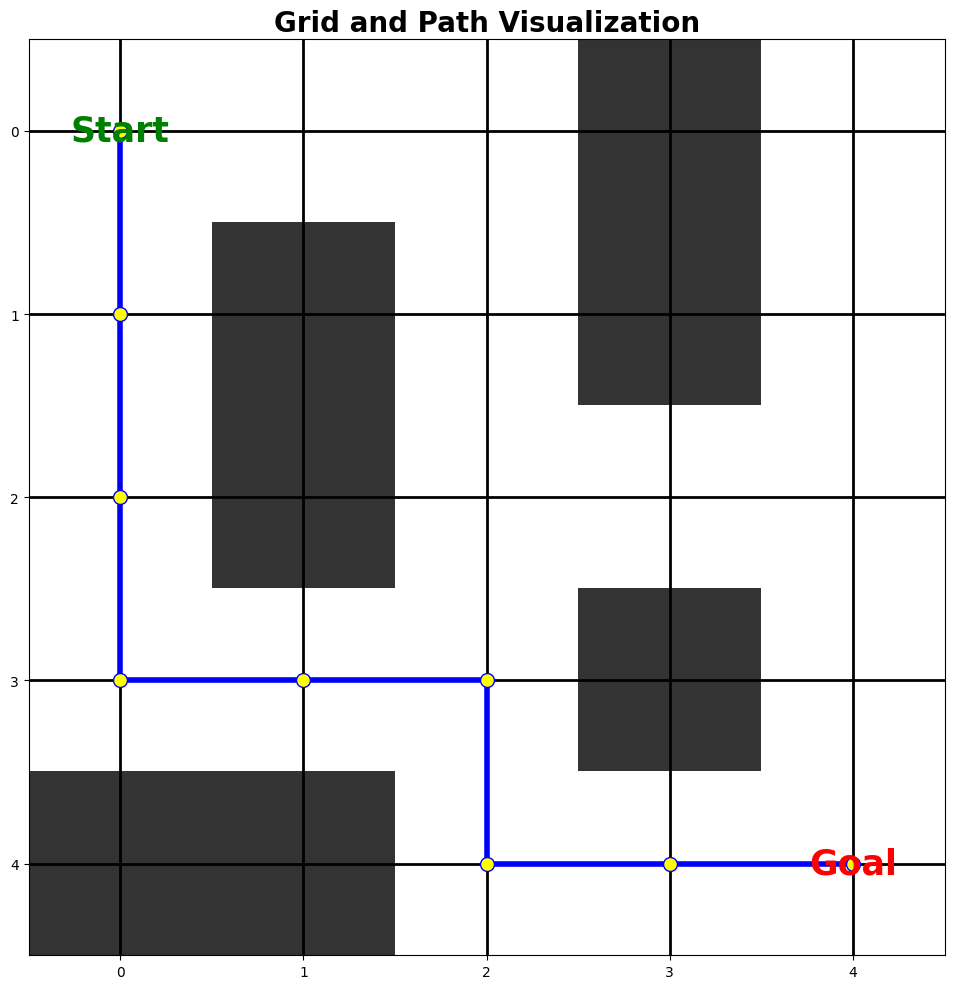

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from collections import deque

# Các hướng di chuyển có thể: lên, xuống, trái, phải
MOVES = [(-1, 0), (1, 0), (0, -1), (0, 1)]

class FSSP_BFS:
    def __init__(self, grid, start, goal):
        self.grid = grid
        self.start = start
        self.goal = goal
        self.rows = len(grid)
        self.cols = len(grid[0])

    # Kiểm tra vị trí có nằm trong lưới & vị trí có bị chặn hay không
    def is_valid(self, position):
        r, c = position
        return 0 <= r < self.rows and 0 <= c < self.cols and self.grid[r][c] == 0

    # Tìm kiếm theo chiều rộng để tìm đường đi ngắn nhất từ điểm bắt đầu đến điểm kết thúc
    def bfs(self):
        queue = deque([(self.start, [self.start])])
        visited = set([self.start])

        while queue:
            current, path = queue.popleft()

            # Nếu vị trí hiện tại là mục tiêu, trả về đường dẫn
            if current == self.goal:
                return path

            # Khám phá tất cả các đường đi có thể (lên, xuống, trái, phải)
            for move in MOVES:
                next_r, next_c = current[0] + move[0], current[1] + move[1]
                next_position = (next_r, next_c)

                if self.is_valid(next_position) and next_position not in visited:
                    visited.add(next_position)
                    queue.append((next_position, path + [next_position]))

        # Trả về None nếu không có đường dẫn đến đích
        return None

    # Hàm trực quan hóa lưới và đường dẫn
    def visualize(self, path):
        grid_np = np.array(self.grid)

        # Tạo hình và trục số
        fig, ax = plt.subplots(figsize=(10, 10))
        ax.imshow(grid_np, cmap='Greys', alpha=0.8)

        # Đánh dấu điểm bắt đầu và điểm kết thúc bằng các ký hiệu đặc biệt
        ax.text(self.start[1], self.start[0], 'Start', color='green', fontsize=25, fontweight='bold', ha='center', va='center')
        ax.text(self.goal[1], self.goal[0], 'Goal', color='red', fontsize=25, fontweight='bold', ha='center', va='center')

        # Vẽ đường đi nếu tìm thấy
        if path:
            path_np = np.array(path)
            ax.plot(path_np[:, 1], path_np[:, 0], color='blue', linewidth=4.0, marker='o', markersize=10, markerfacecolor='yellow', label='Path')

        # Kiểu lưới và gần nhãn
        ax.set_xticks(np.arange(self.cols))
        ax.set_yticks(np.arange(self.rows))
        ax.set_xticklabels(np.arange(self.cols))
        ax.set_yticklabels(np.arange(self.rows))
        ax.grid(which='both', color='black', linewidth=2.0)

        # Thêm tiêu đề lưới và trực quan biểu đồ
        plt.title("Grid and Path Visualization", fontsize=20, fontweight='bold')
        plt.tight_layout()
        plt.show()

# Lưới (0 = ô trống, 1 = chướng ngại vật)
grid = [
    [0, 0, 0, 1, 0],
    [0, 1, 0, 1, 0],
    [0, 1, 0, 0, 0],
    [0, 0, 0, 1, 0],
    [1, 1, 0, 0, 0]
]

# Vị trí điểm bắt đầu và điểm đích
start = (0, 0)
goal = (4, 4)

# Hàm FSSP_BFS - tìm kiếm chiều rộng
planner = FSSP_BFS(grid, start, goal)
path = planner.bfs()
if path:
    print(f"Path found: {path}")
    # Trực quan hóa đường dẫn
    planner.visualize(path)
else:
    print("No path found")

Path found: [(0, 0), (0, 1), (0, 2), (1, 2), (2, 2), (3, 2), (4, 2), (4, 3), (5, 3), (5, 4), (5, 5)]


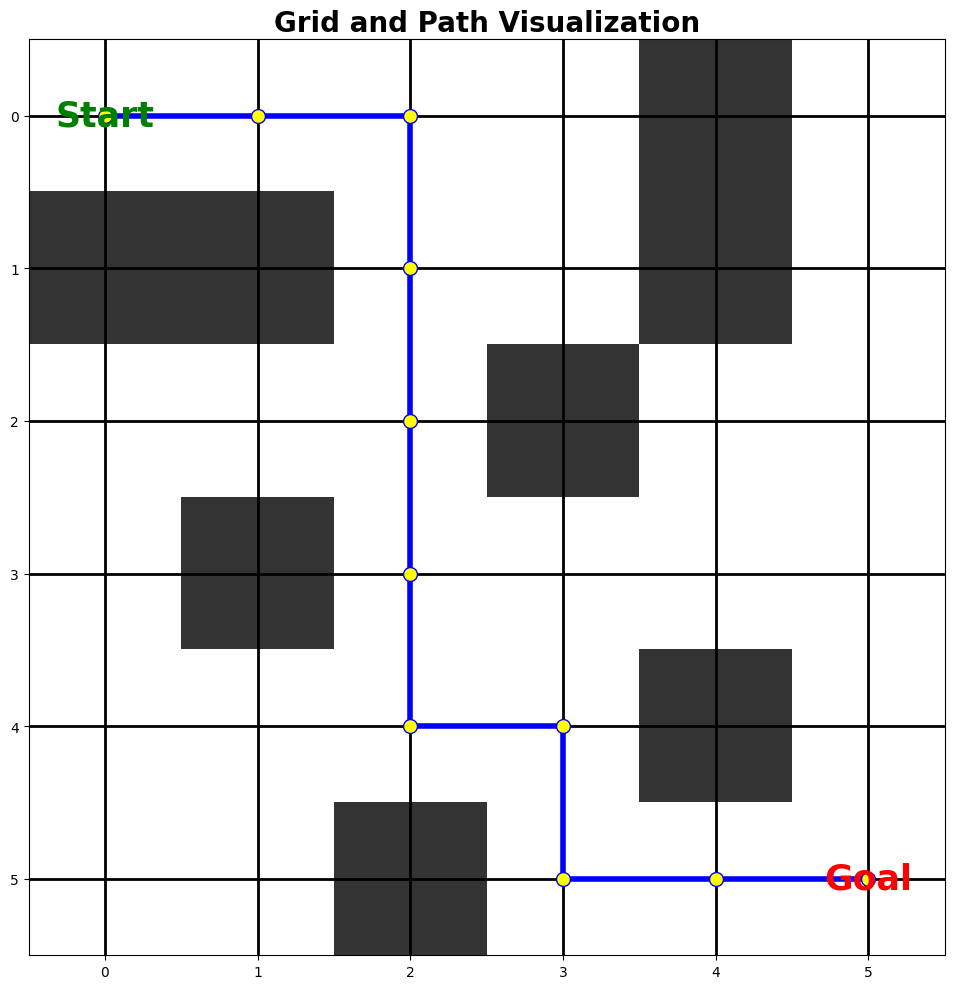

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from collections import deque

# Hướng di chuyển có thể: lên, xuống, trái, phải
MOVES = [(-1, 0), (1, 0), (0, -1), (0, 1)]

class FSSP_BFS:
    def __init__(self, grid, start, goal):
        self.grid = grid
        self.start = start
        self.goal = goal
        self.rows = len(grid)
        self.cols = len(grid[0])

    # Kiểm tra vị trí có nằm trong lưới & vị trí có bị chặn hay không
    def is_valid(self, position):
        r, c = position
        return 0 <= r < self.rows and 0 <= c < self.cols and self.grid[r][c] == 0

    # Tìm kiếm theo chiều rộng để tìm đường đi ngắn nhất từ điểm bắt đầu đến điểm kết thúc
    def bfs(self):
        queue = deque([(self.start, [self.start])])
        visited = set([self.start])

        while queue:
            current, path = queue.popleft()

            # Nếu vị trí hiện tại là mục tiêu, trả về đường dẫn
            if current == self.goal:
                return path

            # Khám phá tất cả các đường đi có thể (lên, xuống, trái, phải)
            for move in MOVES:
                next_r, next_c = current[0] + move[0], current[1] + move[1]
                next_position = (next_r, next_c)

                if self.is_valid(next_position) and next_position not in visited:
                    visited.add(next_position)
                    queue.append((next_position, path + [next_position]))

        # Trả về None nếu không có đường dẫn đến đích
        return None

    # Hàm trực quan hóa lưới và đường dẫn
    def visualize(self, path):
        grid_np = np.array(self.grid)

        # Tạo hình và trục số
        fig, ax = plt.subplots(figsize=(10, 10))
        ax.imshow(grid_np, cmap='Greys', alpha=0.8)

        # Đánh dấu điểm bắt đầu và điểm kết thúc bằng các ký hiệu đặc biệt
        ax.text(self.start[1], self.start[0], 'Start', color='green', fontsize=25,
                fontweight='bold', ha='center', va='center')
        ax.text(self.goal[1], self.goal[0], 'Goal', color='red', fontsize=25,
                fontweight='bold', ha='center', va='center')

        # Vẽ đường đi nếu tìm thấy
        if path:
            path_np = np.array(path)
            ax.plot(path_np[:, 1], path_np[:, 0], color='blue', linewidth=4.0,
                    marker='o', markersize=10, markerfacecolor='yellow', label='Path')

        # Kiểu lưới và gắn nhãn
        ax.set_xticks(np.arange(self.cols))
        ax.set_yticks(np.arange(self.rows))
        ax.set_xticklabels(np.arange(self.cols))
        ax.set_yticklabels(np.arange(self.rows))
        ax.grid(which='both', color='black', linewidth=2.0)

        # Thêm tiêu đề
        plt.title("Grid and Path Visualization", fontsize=20, fontweight='bold')
        plt.tight_layout()
        plt.show()

# Lưới (0 = ô trống, 1 = chướng ngại vật)
grid = [
    [0, 0, 0, 0, 1, 0],
    [1, 1, 0, 0, 1, 0],
    [0, 0, 0, 1, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 0, 0, 0, 1, 0],
    [0, 0, 1, 0, 0, 0]
]

# Vị trí điểm bắt đầu và điểm đích
start = (0, 0)
goal = (5, 5)

# Tìm kiếm đường đi
planner = FSSP_BFS(grid, start, goal)
path = planner.bfs()
if path:
    print(f"Path found: {path}")
    # Hiển thị trực quan
    planner.visualize(path)
else:
    print("No path found")

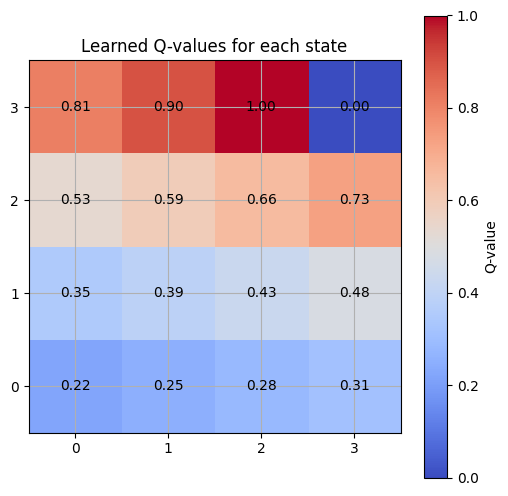

Learned Q-table:
[[7.07617486e-02 2.22053063e-01 3.11493104e-04 6.18041519e-02]
 [2.53897144e-01 1.15713259e-01 1.17161319e-01 1.68686237e-01]
 [2.82424551e-01 1.14109751e-01 1.41251617e-01 1.35048771e-01]
 [1.32804091e-01 3.13810540e-01 2.17810139e-01 2.20103243e-01]
 [2.27680613e-01 3.48678440e-01 2.20655298e-01 2.90389960e-01]
 [3.09245238e-01 3.87420489e-01 3.08398915e-01 2.88595231e-01]
 [3.61150781e-01 3.93257023e-01 4.30467210e-01 3.16923082e-01]
 [4.78296900e-01 3.87462060e-01 4.61085633e-01 4.34858600e-01]
 [5.31441000e-01 4.98707153e-01 5.10638800e-01 5.18882398e-01]
 [5.90490000e-01 5.52269738e-01 5.62861770e-01 5.49744822e-01]
 [6.17896925e-01 6.56100000e-01 6.43338800e-01 6.23279492e-01]
 [7.29000000e-01 7.20616879e-01 7.10689315e-01 7.12496202e-01]
 [8.10000000e-01 7.99034307e-01 7.84477786e-01 8.07503391e-01]
 [9.00000000e-01 8.88027192e-01 8.93361892e-01 8.93990037e-01]
 [1.00000000e+00 9.97261073e-01 9.95361602e-01 9.97534965e-01]
 [0.00000000e+00 0.00000000e+00 0.0000

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Các siêu tham số
n_states = 16
n_actions = 4
goal_state = 15

Q_table = np.zeros((n_states, n_actions))

alpha = 0.1    # Hệ số học
gamma = 0.9    # Hệ số chiết khấu
exploration_prob = 0.2    # Xác suất khám phá
epochs = 1000    # Số tập huấn luyện

# Quy trình Q-learning
for epoch in range(epochs):
    current_state = np.random.randint(0, n_states)

    while current_state != goal_state:
        # Khám phá so với khai thác (ε-chính sách tham lam)
        if np.random.rand() < exploration_prob:
            action = np.random.randint(0, n_actions)
        else:
            action = np.argmax(Q_table[current_state])

        # Chuyển sang trạng thái tiếp theo (mô hình đơn giản)
        next_state = (current_state + 1) % n_states

        # Phần thưởng: 1 nếu đạt goal_state, 0 nếu không
        reward = 1 if next_state == goal_state else 0

        # Cập nhật giá trị Q
        Q_table[current_state, action] += alpha * (reward + gamma * np.max(Q_table[next_state]) - Q_table[current_state, action])

        current_state = next_state    # Cập nhật trạng thái hiện tại

# Trực quan hóa Q-values dạng lưới
q_values_grid = np.max(Q_table, axis=1).reshape((4, 4))

# Biểu đồ dạng lưới các giá trị Q
plt.figure(figsize=(6, 6))
plt.imshow(q_values_grid, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Q-value')
plt.title('Learned Q-values for each state')
plt.xticks(np.arange(4), ['0', '1', '2', '3'])
plt.yticks(np.arange(4), ['0', '1', '2', '3'])
plt.gca().invert_yaxis()    # Đảo ngược trục y để phù hợp
plt.grid(True)

# Hiển thị giá trị Q trên từng ô lưới
for i in range(4):
    for j in range(4):
        plt.text(j, i, f'{q_values_grid[i, j]:.2f}', ha='center', va='center', color='black')

plt.show()

# Xuất ra bảng Q đã học
print("Learned Q-table:")
print(Q_table)